<a href="https://colab.research.google.com/github/AbinReji07/Twitter-Sentiment-Analysis-using-NLP/blob/main/twitter_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
df=pd.read_csv("/content/twitter_validation.csv",names=["id","location","target","text"])
df

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df.isna().sum()

,0
id,0
location,0
target,0
text,0


In [16]:
df["target"].value_counts()

,count
target,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


In [17]:
df.drop(["id","location"],axis=1,inplace=True)

In [18]:
df=df.loc[df["target"]!="Irrelevant"]
df

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [19]:
df.reset_index(drop=True,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


<Axes: xlabel='target', ylabel='count'>

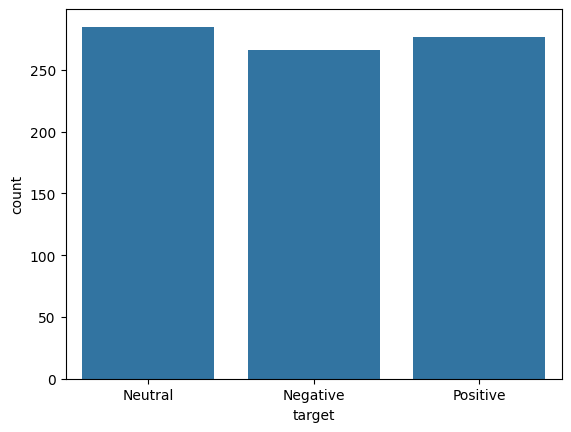

In [20]:
import seaborn as sns
sns.countplot(x="target",data=df)

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
df["target"]=df["target"].map({"Positive":1,"Negative":-1,"Neutral":0})


In [23]:
df["target"].value_counts()

,count
target,
0,285
1,277
-1,266


In [24]:
tweets=df.text#it is a 1dimensional
tweets

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so it’s time to drink wine n play...
826,Bought a fraction of Microsoft today. Small wins.


In [25]:
import re#regular expression
s="abcd 6 7 8935553 a 9"
results=re.findall("\d+",s)
results

['6', '7', '8935553', '9']

In [26]:
tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ",regex=True)
tweets

,text
0,BBC News Amazon boss Jeff Bezos rejects claims...
1,Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi EAHelp I ve had Madeleine McCann in my cell...
...,...
823,Please explain how this is possible How can th...
824,Good on Sony As much as I want to see the new ...
825,Today sucked so it s time to drink wine n play...
826,Bought a fraction of Microsoft today Small wins


In [27]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer("english")
tk=TweetTokenizer()

In [28]:
tweets=tweets.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:" ".join(token))
tweets

,text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi do i pay for word when it functi...
2,csgo matchmak is so full of closet hack it s a...
3,now the presid is slap american in the face th...
4,hi eahelp i ve had madelein mccann in my cella...
...,...
823,pleas explain how this is possibl how can they...
824,good on soni as much as i want to see the new ...
825,today suck so it s time to drink wine n play b...
826,bought a fraction of microsoft today small win


In [29]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words("english")
sw


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
X = tweets.apply(lambda x: [token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:" ".join(token))
X

,text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay word function poor samsungus...
2,csgo matchmak full closet hack truli aw game
3,presid slap american face realli commit unlaw ...
4,hi eahelp madelein mccann cellar past 13 year ...
...,...
823,pleas explain possibl let compani overcharg sc...
824,good soni much want see new ps5 go right much ...
825,today suck time drink wine n play borderland s...
826,bought fraction microsoft today small win


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
X=vector.fit_transform(tweets)
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15872 stored elements and shape (828, 4042)>
  Coords	Values
  (0, 594)	0.4629108689827252
  (0, 2448)	0.36599623128246495
  (0, 424)	0.14270670271218175
  (0, 695)	0.21359974610231888
  (0, 1967)	0.2314554344913626
  (0, 628)	0.24562829169776987
  (0, 2949)	0.24562829169776987
  (0, 877)	0.20183850483102117
  (0, 932)	0.16343698819954883
  (0, 348)	0.21359974610231888
  (0, 2140)	0.1250354715680765
  (0, 1216)	0.22139963227270482
  (0, 1081)	0.24562829169776987
  (0, 903)	0.11802111433875655
  (0, 3691)	0.19717097284763976
  (0, 539)	0.24562829169776987
  (0, 756)	0.24562829169776987
  (1, 2306)	0.22070951194684862
  (1, 3881)	0.2356335699620673
  (1, 1171)	0.19967523356800582
  (1, 2643)	0.28105018600431253
  (1, 1459)	0.1353070451253153
  (1, 3928)	0.32858452112903314
  (1, 3879)	0.20418911525382047
  (1, 1943)	0.12830177949831878
  :	:
  (825, 3439)	0.3109960549248122
  (826, 2306)	0.3026520232000858
  (826, 2529)	0.1778

In [32]:
vector.get_feature_names_out()

array(['00', '00016', '005', ..., 'ztl', 'zyot', 'zysola'], dtype=object)

In [33]:

vector.get_feature_names_out().shape

(4042,)

In [34]:
y=df["target"]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
y_new=rf.predict(vector.transform(["bbc news amazon boss jeff bezo reject claim co"]))
y_new

array([0])

In [38]:
y_pred=rf.predict(X_test)
y_pred

array([ 0, -1,  0,  1,  1, -1, -1,  0,  1, -1,  1,  0,  0,  0,  1,  0, -1,
       -1, -1, -1,  1,  0,  0, -1, -1,  0,  0,  1, -1,  0,  0,  0, -1, -1,
       -1,  0, -1, -1,  0,  1,  1, -1,  1,  0,  0,  1,  0,  0,  1,  0,  0,
        0, -1, -1,  1, -1,  1,  1, -1, -1,  1,  0,  0, -1, -1,  0, -1,  1,
       -1,  0,  1,  1,  0, -1,  0, -1,  1, -1,  0,  1,  0,  0, -1, -1, -1,
        0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1, -1,  0,
       -1,  1,  0,  0,  0,  0, -1,  0,  0,  1, -1,  0, -1, -1,  0,  0, -1,
        0, -1,  1,  1,  1,  0, -1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1, -1, -1,  0, -1,  0,  0,  1, -1,  0, -1, -1,  0,  0,  1, -1,  0,
        1,  1,  0, -1, -1,  1, -1,  1,  0, -1, -1, -1,  1,  0,  1, -1, -1,
        0,  1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1, -1,
        0,  1, -1, -1,  0, -1,  0,  1,  0,  0,  0,  1, -1, -1,  1,  0,  0,
        1,  1,  0,  1,  0,  0, -1,  1, -1,  1, -1, -1, -1,  0,  1,  0, -1,
       -1,  0,  1,  0,  1

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.58      0.66      0.62        74
           0       0.61      0.70      0.65        91
           1       0.64      0.45      0.53        84

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.60       249
weighted avg       0.61      0.61      0.60       249



In [40]:
y_test.value_counts()

,count
target,
0,91
1,84
-1,74
